# Section I - Data Exploration and Prepocessing

Section I will be further subdivided into two parts: 
* Part A - Basic Data Structure
* Part B - Data Exploration
* Part C - Data Preprocessing

#### Part A - Data Exploration
The initial data set from zillow includes a separate file for the transactions, which includes the log error of actual sales price versus Zillow estimates, and a training data set that has 52 features. We will explore the data using various plots such as Boxplots and histograms. This section will have a snap shot of the data exploration. A full exploration of all the features in the dataset is available in the appendix.    

##### Steps 
* 1 Import and Merge Zillow Datasets
* 2 Check Features and data structure
* 3 Univariate Exploration of features : Continous and Categorical  
* 4 Bivariate Exploration of features : Continous and Categorical




#### Part B - Data Preprocessing
The goal of the Data Preprocessing is to make the dataset compatiable for various Machine Learning algorithms. This will requrie creating dummy variables for the categorical features and standizing continous features. Some features will be removed as they present no significant information or is beyone the scope of this capstone. 

##### Steps  
* 1 Univaritate Analysis: Visualize features(Historgram,Boxplot, etc.)       
* 2 Bivariate Analysis: Correlation Analysis
* 3 Feature Selection
* 4 Resolve Significant Issues: missing values, data formats


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import scipy.stats as stats
import sklearn


# special matplotlib argument for improved plots
from matplotlib import rcParams
sea.set_context("poster")
sea.set_style('whitegrid')

%pylab inline 
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


##  Part A - Basic Data Structure

#### Import in the dataset

In [2]:
#Importing Datasets
feature_data = pd.read_csv('properties_2016.csv')
response_data= pd.read_csv('train_2016.csv')

fd = feature_data
rd = response_data

C:\Users\volak\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### View data set

In [6]:
print('Properties' , fd.shape)
print('train', rd.shape)

Properties (2985217, 58)
train (90811, 3)


In [7]:
fd.info()  
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [14]:
print('features form properties dataset', fd.columns)
print('features from train dataset',rd.columns)

features form properties dataset Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', '

In [16]:
fd.head(3)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


In [17]:
rd.head(3)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01


#### Merge Datasets

In [18]:
merged = pd.merge(response_data,feature_data,on="parcelid",how="left") 
merged.shape
merged.to_csv('1merged_data.csv')

In [19]:
# Rename for convience of spliting into different section
df = merged

In [21]:
df.shape

(90811, 60)

In [22]:
df.dtypes

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


#### View counts of types of data

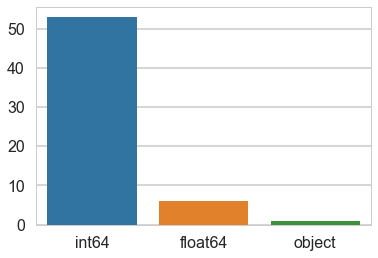

In [23]:
sea.barplot( x = df.dtypes.unique(), y = df.dtypes.value_counts(), data = df)


In [24]:
df.dtypes.value_counts()

float64    53
object      6
int64       1
dtype: int64

#### Convert date to useable categorical variable

In [25]:
df['transactiondate'] = pd.to_datetime(df.transactiondate)
df['month']=df.transactiondate.dt.month
df['day']=df.transactiondate.dt.weekday_name
df=df.drop('transactiondate',axis=1)

##  Part B - Data Exploration
As mentioned previous, the section will contain a snapshot of the data exploration that was done. For full details view the appendix section. The features chosen to for this section are those that the author felt had an a level of significance. 

In [30]:
#### View the unique values of each feature
print ('Unique valuesfinishedsquarefeet12',df.finishedsquarefeet12.unique())
print ('Unique valuesbedroomcnt',df.bedroomcnt.unique())

Unique valuesfinishedsquarefeet12 [  1684.   2263.   2217. ...,   3758.  10681.  10014.]
Unique valuesbedroomcnt [  3.   4.   2.   5.   1.   6.   7.   0.  12.  11.  nan   8.   9.  10.  16.
  14.  13.  15.]


### Univariate Analysis of Response - Logerror histogram

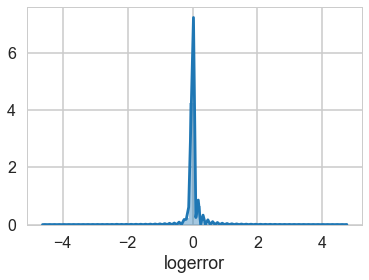

In [31]:
sea.distplot(df['logerror']);  


In [32]:
print("Skewness: %f" % df['logerror'].skew())
print("Kurtosis: %f" % df['logerror'].kurt())

Skewness: 2.154220
Kurtosis: 126.744088


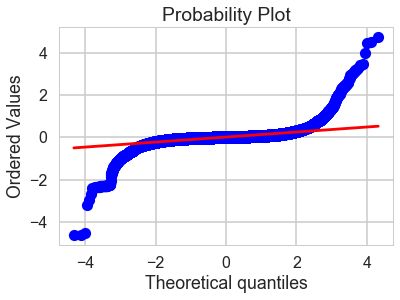

In [33]:
res = stats.probplot(df['logerror'], plot=plt) 

### Univariate Analysis of Continous Features

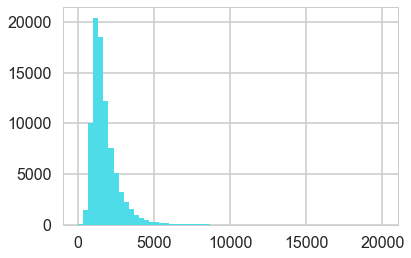

In [35]:
#Total Sqaure feet of the home
plot = df['finishedsquarefeet12'].hist(bins=60,color="#4edde8")

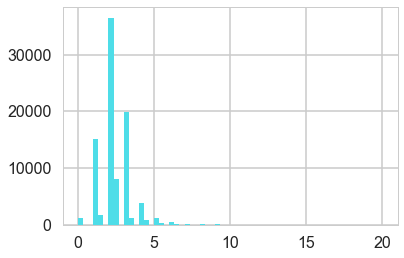

In [36]:
#Total Number of Bedrooms
plot = df['bathroomcnt'].hist(bins=60,color="#4edde8")

### Univariate Analysis of Categorical Features

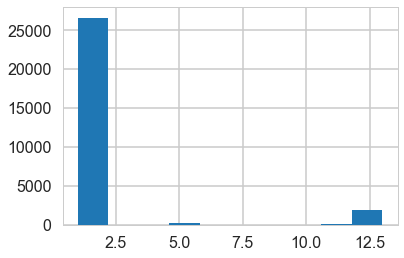

In [40]:
# Airconditioning type, most are blank
plot = df['airconditioningtypeid'].hist()

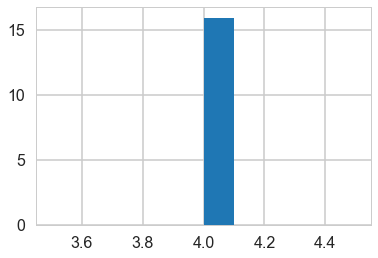

In [41]:
# Type of Building
plot  = df['buildingclasstypeid'].hist()

### Imputing Missing Values
Before we begin a Bivariate exploration of the data, we will impute the missing values by filing them with the median values. This will help with outliers. 

In [42]:
#Impute Median all at once
median_values = df.median(axis=0)
df = df.fillna(median_values, inplace=True)

### Bivariate Analysis of Continous Features

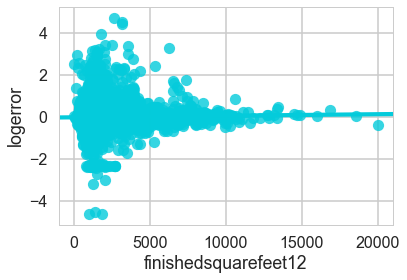

In [43]:
# Log Error vs Total Area of Home
sea.regplot(x='finishedsquarefeet12', y="logerror", data=df,color="#04cbdb")

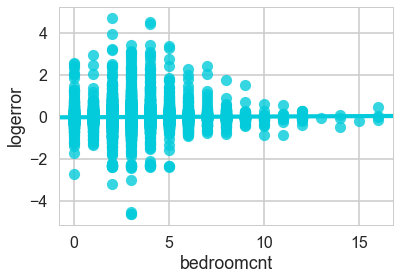

In [44]:
# Log Error vs Total Number of Bedrooms
sea.regplot(x='bedroomcnt', y="logerror", data=df,color="#04cbdb")

### Bivariate Analysis of Categorical Features

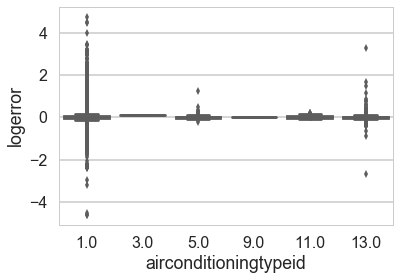

In [45]:
# Log Error vs A/C Type
sea.boxplot(x='airconditioningtypeid', y="logerror", data=df,color="#4edde8")

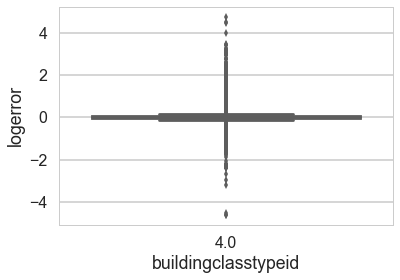

In [46]:
# Log Error vs Building Type
sea.boxplot(x='buildingclasstypeid', y="logerror", data=df,color="#4edde8")

##  Part B - Data PreProcessing

### Create Dummy variables for Categorical data

In [47]:
df=pd.get_dummies(df,columns=['taxdelinquencyflag','fireplaceflag','propertyzoningdesc','propertycountylandusecode','hashottuborspa','airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertylandusetypeid','regionidcounty','regionidcity','regionidzip','regionidneighborhood','storytypeid','typeconstructiontypeid','month','day'],drop_first=True)
""" the coding above automatically drops the original and adds new with prefix"""
      #df=pd.get_dummies(df,columns=['taxdelinquencyflag','fireplaceflag','propertyzoningdesc','propertycountylandusecode','hashottuborspa','airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertylandusetypeid','regionidcounty','regionidcity','regionidzip','regionidneighborhood','storytypeid','typeconstructiontypeid','rawcensustractandblock','censustractandblock','month','day'],drop_first=True)
df.dtypes

parcelid                           int64
logerror                         float64
basementsqft                     float64
bathroomcnt                      float64
bedroomcnt                       float64
calculatedbathnbr                float64
finishedfloor1squarefeet         float64
calculatedfinishedsquarefeet     float64
finishedsquarefeet12             float64
finishedsquarefeet13             float64
finishedsquarefeet15             float64
finishedsquarefeet50             float64
finishedsquarefeet6              float64
fireplacecnt                     float64
fullbathcnt                      float64
garagecarcnt                     float64
garagetotalsqft                  float64
latitude                         float64
longitude                        float64
lotsizesquarefeet                float64
poolcnt                          float64
poolsizesum                      float64
rawcensustractandblock           float64
roomcnt                          float64
threequarterbath

### Drop other features

In [48]:
df=df.drop('rawcensustractandblock',axis=1)
df=df.drop('censustractandblock',axis=1)
df=df.drop('latitude',axis=1)
df=df.drop('longitude',axis=1)

### Drop outliers

In [49]:
# Calculate Outliers
dataset=df
avg = dataset['logerror'].mean()
std = dataset['logerror'].std()
upper_outlier = avg + 2*std
lower_outlier = avg - 2*std

In [50]:
#round up to drop outliers, til reasonable
dataset=dataset[ dataset.logerror > -0.25 ]
dataset=dataset[ dataset.logerror < 0.25 ]
dataset.shape

(86556, 3224)

### split into response and features

In [53]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

MemoryError: 

In [ ]:
### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
